In [10]:
# act one 
# Mod 4 MOdel evaluation - classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve, average_precision_score

# Load the dataset
data = pd.read_csv('E:heart_cleveland_upload.csv')

In [11]:
# Separate features (X) and target variable (y)
X = data.drop('age', axis=1)
y = data['condition']
 

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [13]:
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
 

C:\Users\USER\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)
 

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
 

Confusion Matrix:
[[32  0]
 [ 0 28]]


In [16]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
 

Accuracy: 1.0


In [17]:
# Negative Predictive Value
npv = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Negative Predictive Value:", npv)
 

Negative Predictive Value: 1.0


In [18]:
# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)
 

Sensitivity: 1.0


In [19]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
 

Precision: 1.0


In [20]:
# Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
 

Specificity: 1.0


In [21]:
# Gain and Lift Charts
y_pred_proba = model.predict_proba(X_test)[:, 1]
df = pd.DataFrame({'Actual': y_test, 'Probability': y_pred_proba})
df = df.sort_values(by='Probability', ascending=False).reset_index(drop=True)
df['CumulativePositives'] = df['Actual'].cumsum()
df['CumulativePopulation'] = df.index + 1
 

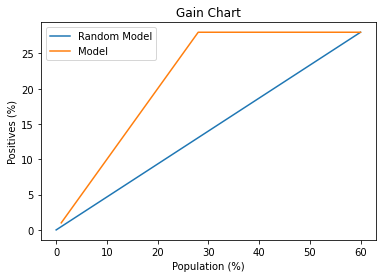

In [22]:
# Gain Chart
plt.plot([0, df.shape[0]], [0, df['Actual'].sum()], label='Random Model')
plt.plot(df['CumulativePopulation'], df['CumulativePositives'], label='Model')
plt.xlabel('Population (%)')
plt.ylabel('Positives (%)')
plt.title('Gain Chart')
plt.legend()
plt.show()
 

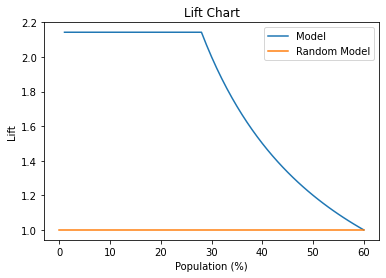

In [23]:
# Lift Chart
plt.plot(df['CumulativePopulation'], df['CumulativePositives'] / (df['CumulativePopulation'] * (df['Actual'].sum() / df.shape[0])), label='Model')
plt.plot([0, df.shape[0]], [1, 1], label='Random Model')
plt.xlabel('Population (%)')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend()
plt.show()
 

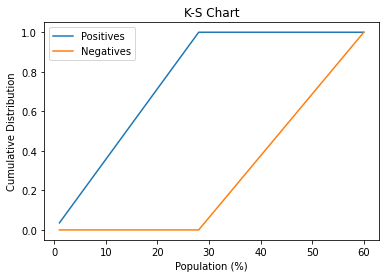

In [24]:
# K-S Chart
df['CumulativeNegatives'] = df['CumulativePopulation'] - df['CumulativePositives']
plt.plot(df['CumulativePopulation'], df['CumulativePositives'] / df['Actual'].sum(), label='Positives')
plt.plot(df['CumulativePopulation'], df['CumulativeNegatives'] / (df.shape[0] - df['Actual'].sum()), label='Negatives')
plt.xlabel('Population (%)')
plt.ylabel('Cumulative Distribution')
plt.title('K-S Chart')
plt.legend()
plt.show()
 

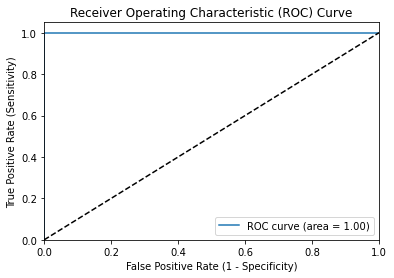

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_proba are the true labels and predicted probabilities, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the random model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
 

In [ ]:
The features (X) and the target variable (y) are separated from the dataset.
The data is split into training and testing sets using train_test_split(). The test size is set to 20% of the data,
and the random state is set to 42 for reproducibility.
A logistic regression model is created using LogisticRegression(), and it is trained on the training data using fit().
Predictions are made on the test set using predict().
The confusion matrix is computed using confusion_matrix(), which shows the counts of true positive, true negative, 
false positive, and false negative predictions.
The accuracy is calculated using accuracy_score() by comparing the predicted labels with the true labels.
The negative predictive value (NPV) is computed as the ratio of true negatives to the sum of true negatives
and false negatives in the confusion matrix.
The sensitivity (recall) is calculated using recall_score(), which measures the ratio of true positives 
to the sum of true positives and false negatives.
The precision is calculated using precision_score(), which represents the ratio of true positives to the sum of true positives 
and false positives.
The specificity is computed as the ratio of true negatives to the sum of true negatives
and false positives in the confusion matrix.
The Gain Chart is plotted using matplotlib. The model's predicted probabilities are sorted in descending order,
and the cumulative percentages of positives and the overall population are calculated. 
The gain chart shows the cumulative percentage of positives as a function of the cumulative percentage of the population. 
A random model line is also plotted for comparison.
The Lift Chart is plotted, which shows the ratio of the cumulative percentage of positives
to the expected percentage of positives for different segments of the population. 
The Lift Chart helps assess the model's effectiveness compared to a random model.
The K-S Chart is plotted, representing the cumulative distribution of positives
and negatives as a function of the cumulative population percentage.
It helps identify the optimal cutoff point for classification.
The Receiver Operating Characteristic (ROC) curve is plotted using roc_curve() and auc() from scikit-learn. 
The true positive rate (sensitivity) is plotted on the y-axis against the false positive rate (1 - specificity) on the x-axis.
The area under the curve (AUC) is calculated using the auc() function.
The ROC curve is displayed, and a diagonal line representing the random model is plotted for comparison.
Ensure you have the necessary libraries installed, such as pandas, numpy, and scikit-learn, using pip.
The code provides various evaluation metrics and visualizations to assess the performance
of the logistic regression model in classifying the heart condition. 
These metrics help evaluate the accuracy, precision, recall, specificity, 
and the model's performance compared to a random model. 
The visualizations aid in understanding the model's classification results
and its performance across different segments of the population.